# Bonus_Assignment_1

<div class="alert alert-block alert-warning"><b>As a data scientist, you have been tasked by a bank that offers home loans across all urban, semi urban and rural areas to create charts that the  bank can use to ccreate a model to predict the customer eligibility for a loan based on the information/details the customer provides when filling out an online application. The customer provides the following information/details: Gender, Marital Status, Education, Number of Dependents, Application Income, Co-Applicant Income, Loan Amount, and Credit History..</b></div>


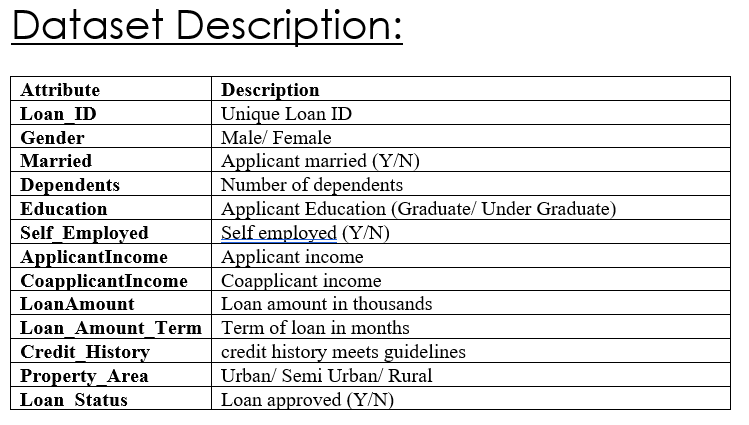


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# Read the  CSV file of your dataset into a dataframe object

dataset_df = pd.read_csv("dataset.csv") 

# sanity test the content of the dataframe object

dataset_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,0,Graduate,No,5849,0,140,360,1,Urban,Y
1,LP001003,Male,No,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [3]:
# General stat description of the data in the dataframe

dataset_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.040000,4177.860000,1948.320000,138.780000,340.800000,0.880000
std,0.879703,2487.662119,2322.676179,77.780248,61.140187,0.328261
min,0.000000,1299.000000,0.000000,16.000000,120.000000,0.000000
25%,0.000000,2600.000000,0.000000,101.750000,360.000000,1.000000
50%,1.000000,3516.500000,1521.000000,117.500000,360.000000,1.000000
75%,2.000000,5025.000000,2840.000000,157.000000,360.000000,1.000000
max,2.000000,12841.000000,10968.000000,349.000000,360.000000,1.000000


In [4]:
# Count how many applicants from every property area

dataset_df['Property_Area'].value_counts()

Urban        34
Semiurban     8
Rural         8
Name: Property_Area, dtype: int64

# Visualize the dataset

## Create histograms for significant features

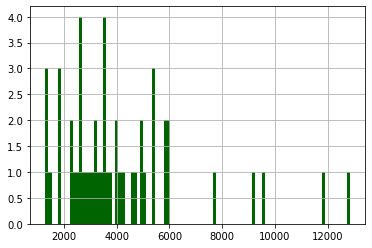

In [5]:
%matplotlib inline
dataset_df['ApplicantIncome'].hist(color='DarkGreen', bins=100)

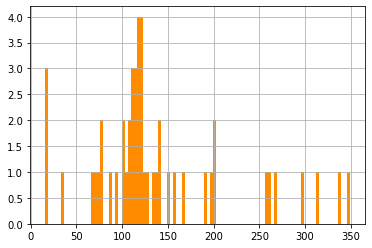

In [6]:
dataset_df['LoanAmount'].hist(color='DarkOrange',bins=100)

## Create stacked-bar chart for some features

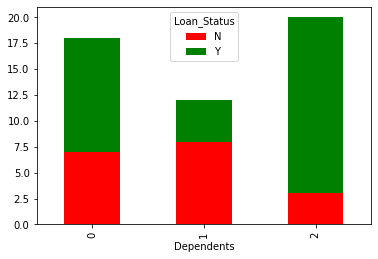

In [7]:
stacked_bar_chart = pd.crosstab(dataset_df['Dependents'], dataset_df['Loan_Status'])
stacked_bar_chart.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

In [8]:
stacked_bar_chart

Loan_Status,N,Y
Dependents,,
0,7,11
1,8,4
2,3,17


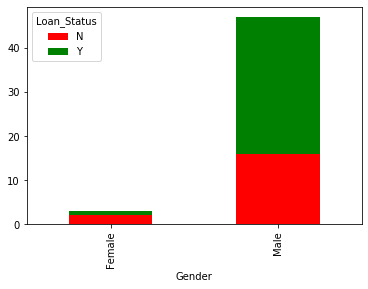

In [9]:
stacked_bar_chart = pd.crosstab(dataset_df['Gender'], dataset_df['Loan_Status'])
stacked_bar_chart.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

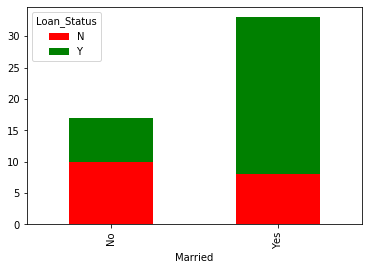

In [10]:
stacked_bar_chart = pd.crosstab(dataset_df['Married'], dataset_df['Loan_Status'])
stacked_bar_chart.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

## Create Boxplot for significant features

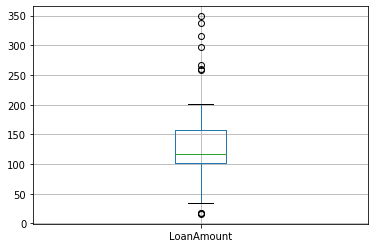

In [11]:
dataset_df.boxplot(column='LoanAmount')

In [12]:
dataset_df['Self_Employed'].value_counts()

No     44
Yes     6
Name: Self_Employed, dtype: int64

## Preprocessng and Normalization

In [13]:
# Lets get the total income and add it to dataset dataframe
dataset_df['TotalIncome'] = dataset_df['ApplicantIncome'] + dataset_df['CoapplicantIncome']

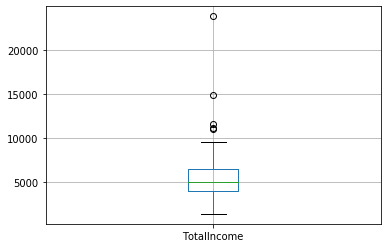

In [14]:
# Boxplot the total income
dataset_df.boxplot(column='TotalIncome')

In [15]:
# What are the data types for the different features and label

dataset_df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents            int64
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
TotalIncome           int64
dtype: object

In [16]:
# Sanity test the head of the dataframe object

dataset_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,Yes,0,Graduate,No,5849,0,140,360,1,Urban,Y,5849
1,LP001003,Male,No,1,Graduate,No,4583,1508,128,360,1,Rural,N,6091
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y,4941
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y,6000


In [17]:
# Sanity test the head of the dataframe object

dataset_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
45,LP001112,Male,Yes,2,Graduate,No,3995,1600,159,360,1,Urban,Y,5595
46,LP001113,Male,Yes,1,Graduate,No,9200,0,338,360,1,Semiurban,N,9200
47,LP001114,Male,No,0,Graduate,No,1785,2840,116,360,1,Rural,N,4625
48,LP001115,Male,Yes,2,Graduate,No,1320,1086,18,120,1,Urban,Y,2406
49,LP001116,Male,Yes,2,Graduate,Yes,5375,3970,259,360,1,Urban,Y,9345


## Requirement #1: Create histograms for the CoApplicantIncome feature

In [18]:
# Add your code for Requiremen #1 in this cell





## Requirement #2: Create a stackchart  for Credit_History and Loan_Status features

In [19]:
# Add your code for Requiremen #2 in this cell





## Requirement #3: Create boxplot chart for ApplicantIncome feature

In [20]:
# Add your code for Requiremen #3 in this cell



